In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

## 1 Calculando $\sqrt{2}$

In [76]:
np.sqrt(2)/3

0.47140452079103173

In [164]:
def estimate_sqrt_2(n, realizations = 1):
    arr_realizations = np.array([])
    
    arr_bernoulli = np.array([])
    
    for _ in np.arange(realizations):
        for _ in np.arange(1, n+1, 1):
            x = 2*np.random.rand()
            y = 2*np.random.rand()
            if y <= 2-x**2:
                arr_bernoulli = np.append(arr_bernoulli, 1)
            else:
                arr_bernoulli = np.append(arr_bernoulli, [0])
    
        arr_realizations = np.append(arr_realizations, 3*np.mean(arr_bernoulli))
    
    return np.mean(arr_realizations), np.std(arr_realizations)

estimate_sqrt_2(500, 10)

(1.4042873809523808, 0.02345604206497211)

In [201]:
2e5

200000.0

In [202]:
%%time
arr_n = [1, 10, 100, 500, 1e3, 5e3, 1e4, 5e4, 1e5, 1e6]
arr_estimations_mean = np.array([])
arr_estimations_std = np.array([])

for n in arr_n:
    print ('Estimating for n = ', n)
    mean, std = estimate_sqrt_2(n, 5)
    arr_estimations_mean = np.append(arr_estimations_mean, mean)
    arr_estimations_std = np.append(arr_estimations_std, std)   

Estimating for n =  1
Estimating for n =  10
Estimating for n =  100
Estimating for n =  500
Estimating for n =  1000.0
Estimating for n =  5000.0
Estimating for n =  10000.0
Estimating for n =  50000.0
Estimating for n =  100000.0
Estimating for n =  1000000.0
Wall time: 14h 39min 5s


In [203]:
df = pd.DataFrame()
df['n'] = arr_n
df['estimate_mean'] = arr_estimations_mean
df['estimate_std'] = arr_estimations_std
df['error'] = np.absolute(df['estimate_mean'] - np.sqrt(2))/np.sqrt(2)

df

,n,estimate_mean,estimate_std,error
0,1.0,0.000000,0.000000,1.000000
1,10.0,1.239000,0.295100,0.123895
2,100.0,1.401600,0.069930,0.008919
3,500.0,1.404980,0.010507,0.006529
4,1000.0,1.417980,0.004224,0.002663
5,5000.0,1.415882,0.006902,0.001180
6,10000.0,1.405990,0.006540,0.005815
7,50000.0,1.410200,0.003211,0.002838
8,100000.0,1.418284,0.001200,0.002878
9,1000000.0,1.415316,0.000284,0.000780


Text(0.5, 1.0, '$log_{10}$ relative error')

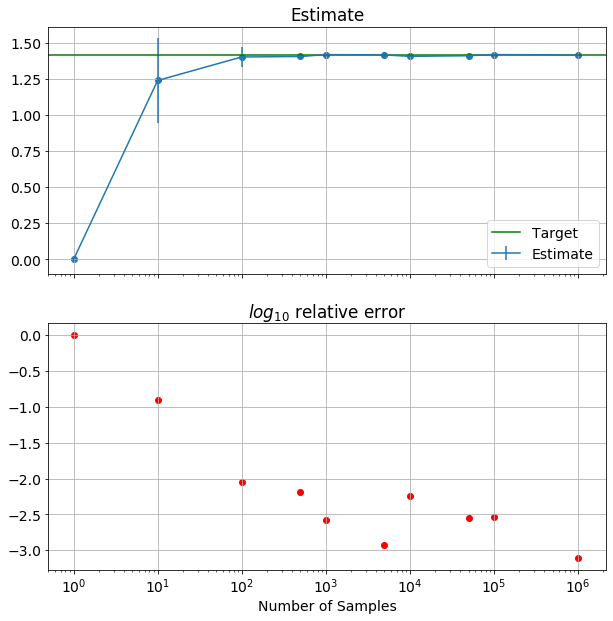

In [389]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

ax=axes[0]
ax.errorbar(x=df['n'], y=df['estimate_mean'], yerr=df['estimate_std'], label='Estimate')
ax.scatter(x=df['n'], y=df['estimate_mean'])
ax.axhline(np.sqrt(2), label='Target', color='Green')
ax.set_xscale('log')
ax.grid(True)
ax.set_title('Estimate')
ax.legend()

ax = axes[1]
ax.scatter(x=df['n'], y=np.log10(df['error']), color='red')
ax.grid(True)
ax.set_xlabel('Number of Samples')
ax.set_title('$log_{10}$ relative error')
# ax.set_ylim(ymin=0)

In [390]:
fig.savefig('./img/relative_error.jpeg', bbox_inches='tight')

## 2 Transformada Inversa

### 2.1 Distribuição Exponencial com parâmetro $\lambda$

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Anaconda\lib\site-packages\IPython\core\events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


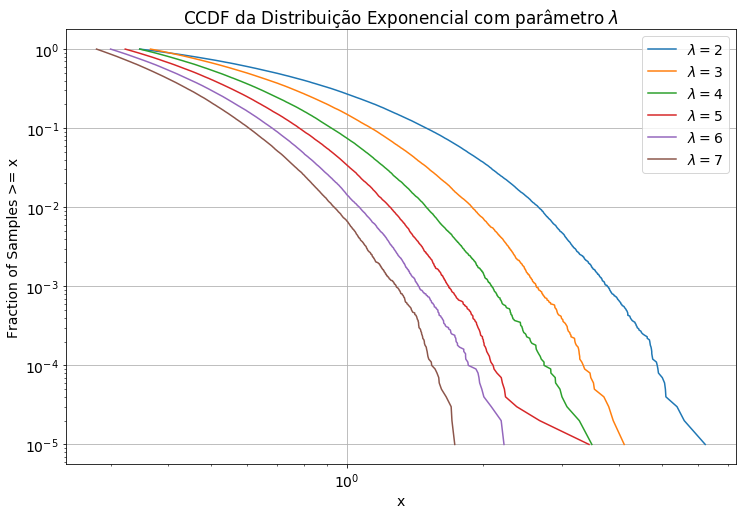

In [412]:
import math
from powerlaw import ccdf

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

n_samples = 100000

for lambda_dist in [2,3,4,5, 6, 7]:    
    f_inv = lambda x: -1/lambda_dist * math.log(x/lambda_dist)
    samples = [f_inv(np.random.rand()) for _ in np.arange(n_samples)]

    x, y = ccdf(samples)

    
    ax.plot(x, y, label = '$\lambda = {}$'.format(lambda_dist))
    
ax.set_title("CCDF da Distribuição Exponencial com parâmetro $\lambda$")
ax.set_xscale("log"), ax.set_yscale("log")
ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
ax.grid(True)
ax.legend()
fig.savefig('./img/2_1_ccdf.jpeg', bbox_inches='tight')

## 2.2 Distribuição de Pareto

In [ ]:
def plot_ccdf(samples, name=''):
    x, y = ccdf(samples)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
    ax.set_title("CCDF " + name)
    ax.plot(x, y)
    ax.set_xscale("log"), ax.set_yscale("log")
    ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
    ax.grid(True)
    return fig, ax 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Anaconda\lib\site-packages\IPython\core\events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


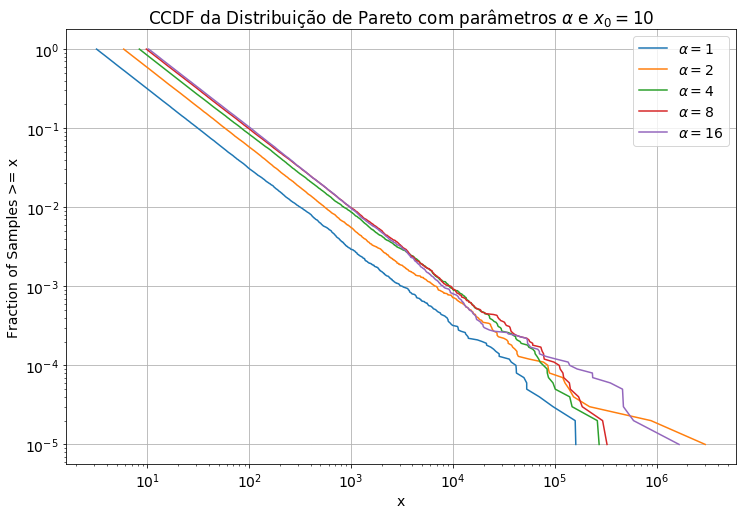

In [433]:
n_samples = 100000

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
for alpha in [1, 2, 4, 8, 16]:

    x_0 = 10
    f_inv = lambda x: (alpha*(x_0**alpha)/(x**(alpha+1)))**(1/(alpha+1))

    samples = [f_inv(np.random.rand()) for _ in np.arange(n_samples)]

    x, y = ccdf(samples)
    ax.plot(x, y, label='$\\alpha = {}$'.format(alpha))

ax.set_title("CCDF da Distribuição de Pareto com parâmetros $\\alpha$ e $x_0 = {}$".format(x_0))

ax.set_xscale("log"), ax.set_yscale("log")
ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
ax.grid(True)
ax.legend()
fig.savefig('./img/2_2_ccdf.jpeg', bbox_inches='tight')

## 4. Gerando amostras normais

In [342]:
lambda_dist = 1
f_y_inv = lambda x: -1/lambda_dist * math.log(x/lambda_dist)
f_y = lambda x: np.exp(-lambda_dist*x)/lambda_dist
f_z = lambda x: (2*np.pi)**(-0.5) * np.exp(-0.5 * x**2)
f_z(0)
f_y_inv(np.random.rand())

1.248054978274395

In [372]:
n_samples = 50000
samples = []
import random
for _ in np.arange(n_samples):
    rejected = True
    while rejected:
        x = np.random.rand()
        i = f_y_inv(x)
        u = random.uniform(0, f_y(i))
        if u < f_z(i):
            rejected = False
        
    samples.append(i)
    samples.append(-i)


C:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


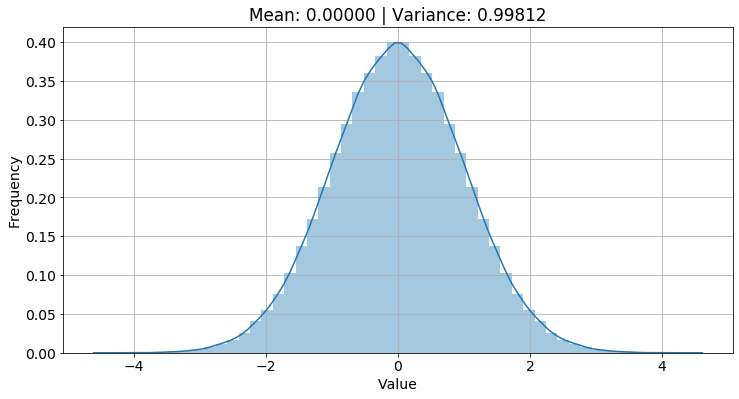

In [388]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(samples, ax=ax)
ax.grid(True)
ax.set_title('Mean: {:.05f} | Variance: {:.05f}'.format(np.mean(samples), np.std(samples)**2))
ax.set_xlabel('Value'), ax.set_ylabel('Frequency')
fig.savefig('./img/4_distribution.jpeg', bbox_inches='tight')

## 6. Integração de Monte Carlo

In [502]:
samples = []
samples.append([1,2,3])
samples.append([1,2,3])
np.array(samples)

array([[1, 2, 3],
       [1, 2, 3]])

In [580]:
f = lambda x: x**alpha

def get_sample(alpha, a, b):
    x_s = random.uniform(a, b)
    y_s = random.uniform(0, b**alpha)
    
    
    result = 1 if f(x_s) <= y_s else 0
    return [x_s, y_s, result]

n_samples = 4000
alpha, a, b = 4, 1, 2

samples = []
for _ in np.arange(n_samples):
    x, y, sample = get_sample(alpha, a, b)
    color = 'lightgray' if f(x) <= y else 'purple'
    samples.append([x, y, sample, color])

g = (b**(alpha+1)-a**(alpha+1))/(alpha+1)

np.array(samples)

array([['1.0396107256757463', '4.897893791736415', '1', 'lightgray'],
       ['1.9469539306749408', '4.413050572884973', '0', 'purple'],
       ['1.9381664404450563', '8.44377103566489', '0', 'purple'],
       ...,
       ['1.3772158181849496', '14.93553940050559', '1', 'lightgray'],
       ['1.916665342069078', '4.274511034416431', '0', 'purple'],
       ['1.1006070855799388', '4.150529854689635', '1', 'lightgray']],
      dtype='<U32')

In [584]:
np.mean([f(random.uniform(a, b)) for _ in np.arange(n_samples)])

6.235129435847688

In [581]:
df = pd.DataFrame(samples, columns=['x', 'y', 'sample', 'color'])
estimate = (b**alpha)*(b-a)*df['sample'].mean()/alpha
target = g

In [587]:
8558868+8630227+8460995+7717657

33367747

Text(0.5, 1.0, 'Estimate = 2.47 | Target = 6.20')

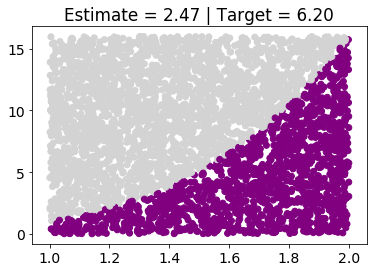

In [582]:
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'], color=df['color'])
ax.set_title('Estimate = {:.02f} | Target = {:.02f}'.format(estimate, target))

## 7. Gerando permutações

In [606]:
def get_sample(s, k):
    space = np.array(s)
    n = space.shape[0]    
    assert k <= n
    
    for i in np.arange(n):        
        j = int(random.uniform(0, n-1))
        temp = space[j]
        space[j] = space[n-1-i]
        space[n-1-i] = temp
        
    return space[:k]

space = np.arange(15)
k = 10
get_sample(space, k)

array([ 4,  3, 14, 11,  5, 10,  2, 12,  7, 13])

In [618]:
%%time
import time
array_n = [1e4, 1e6, 1e8]
array_k = [1e1, 1e2, 1e3, 1e4]

df = pd.DataFrame(columns = ['n', 'k', 'elapsed'])
for n in array_n:
    space = list(np.arange(n))
    for k in array_k:
        start = time.time()
        
        for _ in np.arange(1e3):
            get_sample(space, int(k))
        
        elapsed = time.time()-start
        print ('Elapsed time for n = {} and k = {}: {}'.format(n, k, elapsed))
        df.loc[df.shape[0]] = [n, k, elapsed]

Elapsed time for n = 10000.0 and k = 10.0: 15.440009117126465
Elapsed time for n = 10000.0 and k = 100.0: 14.989985466003418
Elapsed time for n = 10000.0 and k = 1000.0: 15.826970338821411
Elapsed time for n = 10000.0 and k = 10000.0: 14.77202844619751
Elapsed time for n = 1000000.0 and k = 10.0: 1574.3321845531464
Elapsed time for n = 1000000.0 and k = 100.0: 1619.716998577118
Elapsed time for n = 1000000.0 and k = 1000.0: 1682.808973312378
Elapsed time for n = 1000000.0 and k = 10000.0: 2286.390758752823


KeyboardInterrupt: 

In [613]:
df

,n,k,elapsed
0,10000.0,10.0,0.100506
1,10000.0,100.0,0.100870
2,10000.0,1000.0,0.100665
3,10000.0,10000.0,0.100279
4,1000000.0,10.0,0.102075
5,1000000.0,100.0,0.100132
6,1000000.0,1000.0,0.100751
7,1000000.0,10000.0,0.100892
8,100000000.0,10.0,0.100567
9,100000000.0,100.0,0.100405
